<a href="https://colab.research.google.com/github/Machine-Learning-for-Finance/Machine-Learning-Algorithms/blob/master/01-Data%20Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from os import environ
import seaborn
from tqdm import tqdm

environ['TF_FORCE_GPU_ALLOW_GROWTH'] = "true"
    
from utils import hello_world
hello_world()

# Loading From Google Drive

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base_location = "/content/drive/My Drive/data/"
except:
    base_location = "/data/FannieMae/"

In [3]:
!ls /content/drive/My\ Drive/data/2010Q1

ls: cannot access '/content/drive/My Drive/data/2010Q1': No such file or directory


# Financial Datasets

There are a large number of financial datasets that are available, the first one we will discuss is the Fannie Mae Fixed Rate Mortgage Dataset.

- https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html

- https://loanperformancedata.fanniemae.com/lppub/index.html#Portfolio

Which consists of both Acquisitions and Performance data for a collection of mortgages.

To make our lives a bit easier here are the column names pulled from the provided `R` script to load the data.  See `R` is good for at least one thing.

In [4]:
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

In [5]:
# Data path will change depending on your system setup.

acquisition_data_path = f"{base_location}2010Q1/Acquisition_2010Q1.txt"

#### Loading the Acquisition Data from CSV

To load the data we call from `pandas`, `pd.read_csv` which automatically handles loading data from the csv file.  We provide column names, a notification that the file doesn't include headers, and information on what the column separator is `|` in this case.

In [6]:
acquisition_df = pd.read_csv(
    acquisition_data_path,
    names=AcquisitionColumnNames,
    header=None,
    sep="|"
)

In [7]:
acquisition_df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG'],
      dtype='object')

#### Loading the Performance Data

In [8]:
performance_data_path = f"{base_location}2010Q1/Performance_2010Q1.txt"

performance_df = pd.read_csv(
    performance_data_path,
    names=PerformanceColumnNames,
    header=None,
    sep="|"
)

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First thing we note is that this takes longer than the `Acquisitions` data to load, stemming from the fact that for each loan there are multiple monthly data elements loaded.

# Descriptive Statistics

Seller Name:

In [9]:
acquisition_df['Seller.Name'].unique()

array(['WELLS FARGO BANK, N.A.',
       'JPMORGAN CHASE BANK, NATIONAL ASSOCIATION', 'OTHER',
       'CITIMORTGAGE, INC.', 'BANK OF AMERICA, N.A.',
       'SUNTRUST MORTGAGE INC.', 'U.S. BANK N.A.',
       'FLAGSTAR CAPITAL MARKETS CORPORATION', 'PHH MORTGAGE CORPORATION',
       'PNC BANK, N.A.', 'HSBC BANK USA, NATIONAL ASSOCIATION',
       'GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)',
       'GMAC MORTGAGE, LLC', 'CITIZENS BANK, NATIONAL ASSOCIATION'],
      dtype=object)

In [10]:
LOAN_IDS = set(acquisition_df['LOAN_ID'])
print(f"There are {len(LOAN_IDS)} Loan IDs!")

There are 323174 Loan IDs!


In [11]:
PERFORMANCE = {}

for loan_id in LOAN_IDS:
    ID = performance_df["LOAN_ID"] == loan_id
    df = performance_df[ID]
    df.to_csv(f"/home/capcolabs/Stevens/ProjectData/FannieMae/2010Q1/Performance/{loan_id}.csv")

In [13]:
df.columns

Index(['LOAN_ID', 'Monthly.Rpt.Prd', 'Servicer.Name', 'LAST_RT', 'LAST_UPB',
       'Loan.Age', 'Months.To.Legal.Mat', 'Adj.Month.To.Mat', 'Maturity.Date',
       'MSA', 'Delq.Status', 'MOD_FLAG', 'Zero.Bal.Code', 'ZB_DTE', 'LPI_DTE',
       'FCC_DTE', 'DISP_DT', 'FCC_COST', 'PP_COST', 'AR_COST', 'IE_COST',
       'TAX_COST', 'NS_PROCS', 'CE_PROCS', 'RMW_PROCS', 'O_PROCS',
       'NON_INT_UPB', 'PRIN_FORG_UPB_FHFA', 'REPCH_FLAG', 'PRIN_FORG_UPB_OTH',
       'TRANSFER_FLG'],
      dtype='object')

In [14]:
df['Delq.Status']

12185420    0
12185421    0
12185422    0
12185423    0
12185424    0
           ..
12185524    0
12185525    0
12185526    0
12185527    0
12185528    0
Name: Delq.Status, Length: 109, dtype: object

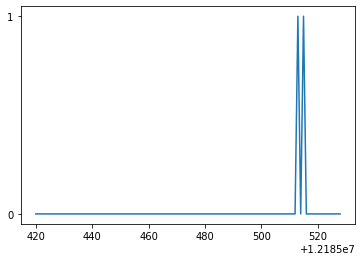

In [15]:
plt.plot(df['Delq.Status'])

In [37]:
df['Delq.Status'][41]

'X'

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]


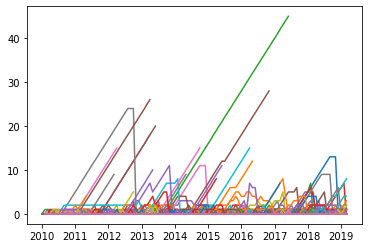

In [71]:
D = []
T = []

from random import shuffle

break_value = 3000
LOAN_IDS = list(LOAN_IDS)

for ids, loan_id in enumerate(LOAN_IDS):
    df_path = f"/home/capcolabs/Stevens/ProjectData/FannieMae/2010Q1/Performance/{loan_id}.csv"
    df = pd.read_csv(df_path)
    if "X" in df['Delq.Status'].values:
        continue
    D.append(df['Delq.Status'])
    T.append(pd.to_datetime(df['Monthly.Rpt.Prd']))
    plt.plot(T[-1], D[-1])
    if ids > break_value:
        break

plt.show()

In [72]:
loan_id = LOAN_IDS[653]
df_path = f"/home/capcolabs/Stevens/ProjectData/FannieMae/2010Q1/Performance/{loan_id}.csv"
df = pd.read_csv(df_path)

In [73]:
df[['Monthly.Rpt.Prd', 'Delq.Status', 'FCC_DTE']]

,Monthly.Rpt.Prd,Delq.Status,FCC_DTE
0,02/01/2010,0,NaN
1,03/01/2010,0,NaN
2,04/01/2010,0,NaN
3,05/01/2010,0,NaN
4,06/01/2010,0,NaN
...,...,...,...
105,11/01/2018,0,NaN
106,12/01/2018,0,NaN
107,01/01/2019,0,NaN
108,02/01/2019,0,NaN
